In [1]:
!pip install langchain langchain_core langchain_community langgraph langchain-groq
!pip install faiss-cpu sentence-transformers pypdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 21.9 MB/s eta 0:00:00


In [2]:
from google.colab import files

uploaded = files.upload()
pdf_file = list(uploaded.keys())[0]

print("Uploaded:", pdf_file)


Saving issa_final.pdf to issa_final (1).pdf
Uploaded: issa_final (1).pdf


In [3]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(pdf_file)
documents = loader.load()

resume_text = " ".join([doc.page_content for doc in documents])

print(resume_text[:500])  # preview


MOHAMMED ISSA ILYAS
Bangalore, Karnataka — (+91) 9740228505 — issailyas05@gmail.com
GitHub — LinkedIn
EDUCA TION
Atria Institute of T echnology , Bangalore Dec 2022 – Jun 2026
BE in Computer Science and Data Science — CGPA: 7.0
St. Germain’s PU College, Bangalore 2022
PUC — Percentage: 80%
Smt. Kamalabai Educational Institution, Bangalore 2020
SSLC — CGPA: 7.0
CAREER OBJECTIVE
Machine Learning enthusiast with strong skills in Python, data preprocessing, and ML model development
using Scikit-lear


In [5]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
docs = splitter.create_documents([resume_text])

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vectorstore = FAISS.from_documents(docs, embeddings)
retriever = vectorstore.as_retriever(search_kwargs={"k":3})


/tmp/ipython-input-4250750711.py:8: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.war

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    groq_api_key="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".strip(),
    model_name="llama-3.1-8b-instant"
)
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x79d1b7577c50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79d1e0c91400>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
from typing_extensions import TypedDict
class State(TypedDict):
  application:str
  resume_context: str
  experience_level:str
  skill_match:str
  response:str

In [8]:
from langgraph.graph import StateGraph

workflow=StateGraph(State)

In [9]:
def retrieve_resume_context(state: State) -> State:
    print("\n🔎 Retrieving resume context (RAG)")

    docs = retriever.invoke(state["application"])
    context = " ".join([doc.page_content for doc in docs])

    return {"resume_context": context}


In [10]:
from langchain_core.prompts import ChatPromptTemplate

def categorize_experience(state: State) -> State:
    print("\n Categorizing experience")

    prompt = ChatPromptTemplate.from_template(
        "Based on the resume context below, categorize the candidate as "
        "'Entry-level', 'Mid-Level', or 'Senior-level'.\n\n"
        "Resume Context:\n{context}"
    )

    chain = prompt | llm
    result = chain.invoke({"context": state["resume_context"]}).content

    print("Experience:", result)
    return {"experience_level": result}


def assess_skillset(state: State) -> State:
    print("\n Assessing skillset")

    prompt = ChatPromptTemplate.from_template(
        "Based on the resume context below for a Python developer role, "
        "respond ONLY 'match' or 'no match'.\n\n"
        "Resume Context:\n{context}"
    )

    chain = prompt | llm
    result = chain.invoke({"context": state["resume_context"]}).content

    print("Skill match:", result)
    return {"skill_match": result}


def schedule_hr_interview(state: State) -> State:
    print("\n Scheduling HR interview")
    return {"response": "Candidate shortlisted for HR interview."}


def escalate_to_recruiter(state: State) -> State:
    print("\n Escalating to recruiter")
    return {"response": "Senior candidate but skill mismatch → escalate."}


def reject_application(state: State) -> State:
    print("\n Sending rejection")
    return {"response": "Candidate rejected."}








In [11]:
workflow.add_node("retrieve_resume_context", retrieve_resume_context)
workflow.add_node("categorize_experience", categorize_experience)
workflow.add_node("assess_skillset", assess_skillset)
workflow.add_node("schedule_hr_interview", schedule_hr_interview)
workflow.add_node("escalate_to_recruiter", escalate_to_recruiter)
workflow.add_node("reject_application", reject_application)


In [12]:
def route_app(state: State) -> str:
    if "match" in state["skill_match"].lower():
        return "schedule_hr_interview"
    elif "senior" in state["experience_level"].lower():
        return "escalate_to_recruiter"
    else:
        return "reject_application"


In [14]:
from langgraph.graph import START,END
workflow.add_edge(START, "retrieve_resume_context")
workflow.add_edge("retrieve_resume_context", "categorize_experience")
workflow.add_edge("categorize_experience", "assess_skillset")

workflow.add_conditional_edges(
    "assess_skillset",
    route_app,
    {
        "schedule_hr_interview": "schedule_hr_interview",
        "escalate_to_recruiter": "escalate_to_recruiter",
        "reject_application": "reject_application",
    }
)

workflow.add_edge("schedule_hr_interview", END)
workflow.add_edge("escalate_to_recruiter", END)
workflow.add_edge("reject_application", END)


In [15]:
app=workflow.compile()

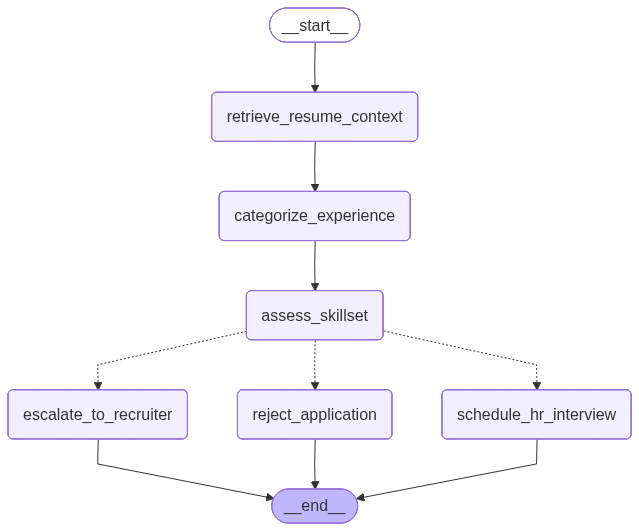

In [16]:
app

In [17]:
result = app.invoke({
    "application": "Screen candidate for Python developer role"
})

print("\n FINAL RESULT:", result["response"])




🔎 Retrieving resume context (RAG)

 Categorizing experience
Experience: Based on the resume context provided, I would categorize the candidate as 'Entry-level'. 

Here's why:

1. **Recent Education and Employment History**: The candidate has completed their BE in Computer Science and Data Science in June 2026 (still in progress). They have also worked as a Data Science Contributor & AEO/GEO Content Optimization Associate at Archova Visuals for only 2-3 months in 2024-2025. This suggests that they are new to the industry.

2. **Lack of Industry Experience**: The candidate's work experience is limited to a short-term role, and the projects mentioned are likely academic or personal projects. There's no mention of any significant industry experience, which is often a characteristic of mid-level or senior-level candidates.

3. **Technical Skills**: The candidate has a good grasp of technical skills, including programming languages, machine learning libraries, and frameworks. This suggests 


 Categorizing the experience level of the candidates: 
Experience level:Based on the provided job application information, I would categorize the candidate as 'Mid-Level'. 

Here's my reasoning:

- 2 years of experience in Java is a moderate level of experience. It suggests that the candidate has some hands-on experience and has had time to develop skills, but still has not reached a high level of seniority.

- Entry-level candidates typically have less than 1-2 years of experience, often as recent graduates or individuals new to the industry.

- Senior-level candidates typically have 5-10 years or more of experience, with a strong track record of accomplishments, leadership, and technical expertise. 

Therefore, based on the provided information, 'Mid-Level' seems to be the most fitting category for this candidate.

 Assessing the skill set of candidate: 
skill match:Unfortunately no match. 

This candidate has experience in Java, but the job application is for a Python developer. Al